In [1]:
# # Load the dataset
# crime_df=pd.read_csv("Min_downsampled_df_Mar7_ 539576.csv", na_values=['NULL', '?', 'NONE', ' '])

# print("Shape of dataset:",crime_df.shape)
# crime_df.columns

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# !pip install category_encoders

Mounted at /content/drive


In [4]:
crime_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data-LA-Project/Min_downsampled_df_Mar7_ 539576.csv')
print(crime_df.shape)

(539576, 77)


# Prepare for Data Training

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.preprocessing import scale

In [6]:
# Drop all the weather
crime_df=crime_df.drop(['Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed',
       'Avg_Pressure','Total_Precipitation'], axis =1)

In [7]:
print("Shape of dataset:",crime_df.shape)
crime_df.columns

Shape of dataset: (539576, 71)


Index(['Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Rpt_Dist_No',
       'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Vict_Age', 'LAT', 'LON',
       'Crime_Category', 'Crime_Category_Code', 'Weapon_Reported',
       'Vict_Sex_M', 'Vict_Sex_X', 'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5',
       'AREA_6', 'AREA_7', 'AREA_8', 'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12',
       'AREA_13', 'AREA_14', 'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18',
       'AREA_19', 'AREA_20', 'AREA_21', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016',
 

In [8]:
# Selecting predictor and target variables
X = crime_df.drop(['Date_Rptd','Rpt_Dist_No','DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Crm_Cd_Desc', 'Crm_Cd', 'Crime_Category_Code','Crime_Category'], axis=1)
y = crime_df['Crime_Category']

In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Scale the data using the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Logistic Regression without weather: lr_wo_weather

In [11]:
logreg = LogisticRegression(solver='saga', max_iter=1000)
logreg.fit(X_train_scaled, y_train.ravel()) # ravel to flatten data
y_pred = logreg.predict(X_test_scaled)

print("Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Logistic Regression
Accuracy: 0.5059212721005226
Confusion Matrix:
[[ 9399   163    11  3229   516     4   128    70]
 [   22  7613    54     0   786    81  2316  2655]
 [ 1979   941  1836   304   834  5610  1167   894]
 [  243    98     5 12166   699    41   126   102]
 [ 1300  2630    15  2419  3681   149   956  2288]
 [   15   106  1574   499    71 10786    59    91]
 [  929  4418   106    37   638   208  3816  3371]
 [  646  4123    84     0   821     0  2688  5300]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.65      0.70      0.67     13520
        Fraud and Financial Crimes       0.38      0.56      0.45     13527
              Miscellaneous Crimes       0.50      0.14      0.21     13565
             Robbery and Extortion       0.65      0.90      0.76     13480
                   Sexual Offenses       0.46      0.27      0.34     13438
                Theft and Burglary       0.

In [12]:
# Feature importances
feature_importances = logreg.coef_[0]
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
                                        Feature  Importance
4                               Weapon_Reported    2.469119
27                   Region_Ethnic_Origin_Black    0.231009
1                                      Vict_Age    0.225438
28  Region_Ethnic_Origin_Hispanic/Latin/Mexican    0.188284
5                                    Vict_Sex_M    0.186116
61                                    Year_2023    0.119639
0                                      Part_1-2    0.114201
41                                      Month_5    0.075099
46                                     Month_10    0.072394
43                                      Month_7    0.070965
45                                      Month_9    0.070726
44                                      Month_8    0.069424
47                                     Month_11    0.066990
2                                           LAT    0.066546
59                                    Year_2021    0.066081
55                 

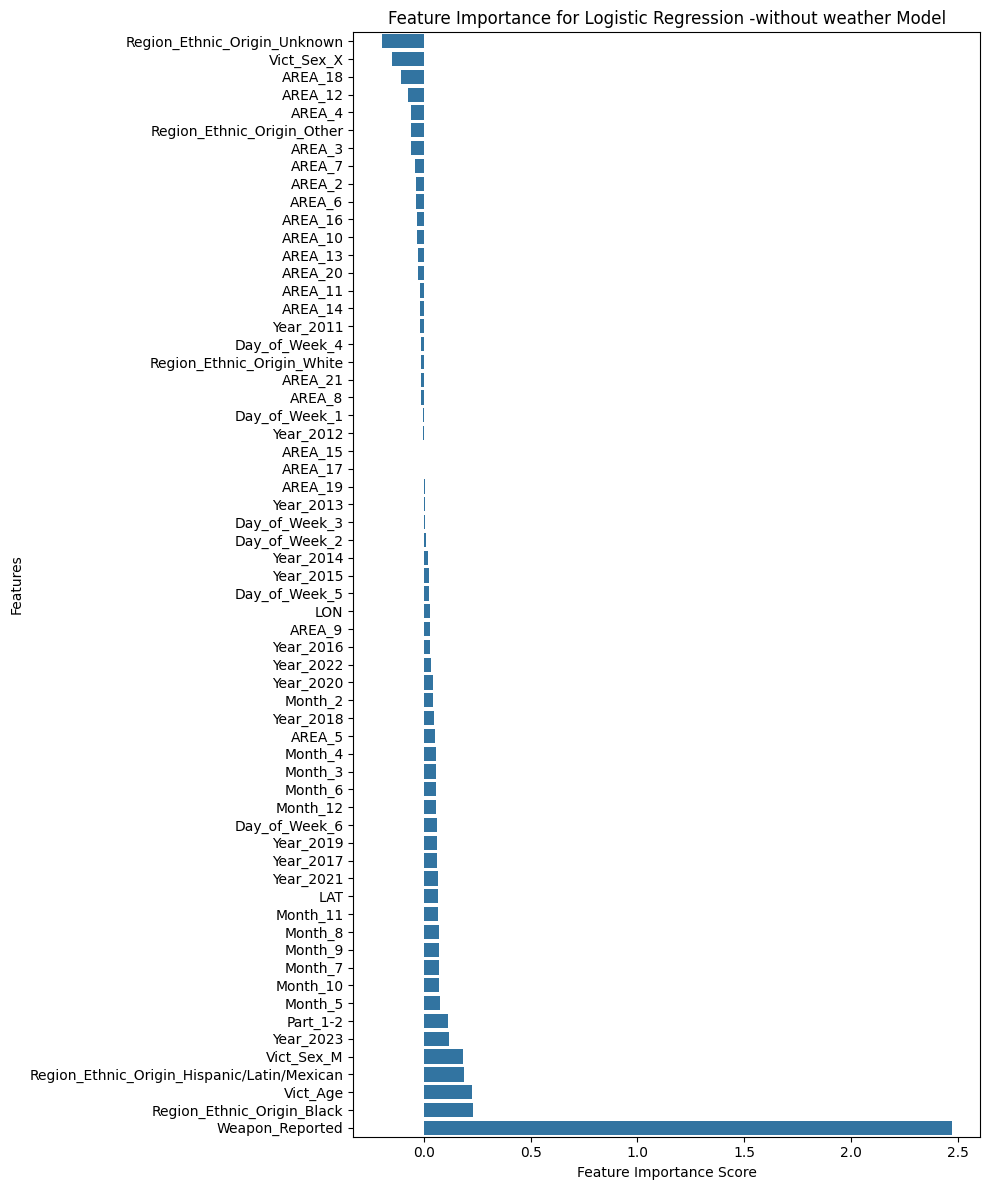

In [13]:
# Feature importances
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Logistic Regression -without weather Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

ROC AUC: 0.8568785846670723
Accuracy: 0.5059212721005226
Sensitivity: 0.5071213082333021
Specificity: 0.9294087479078794


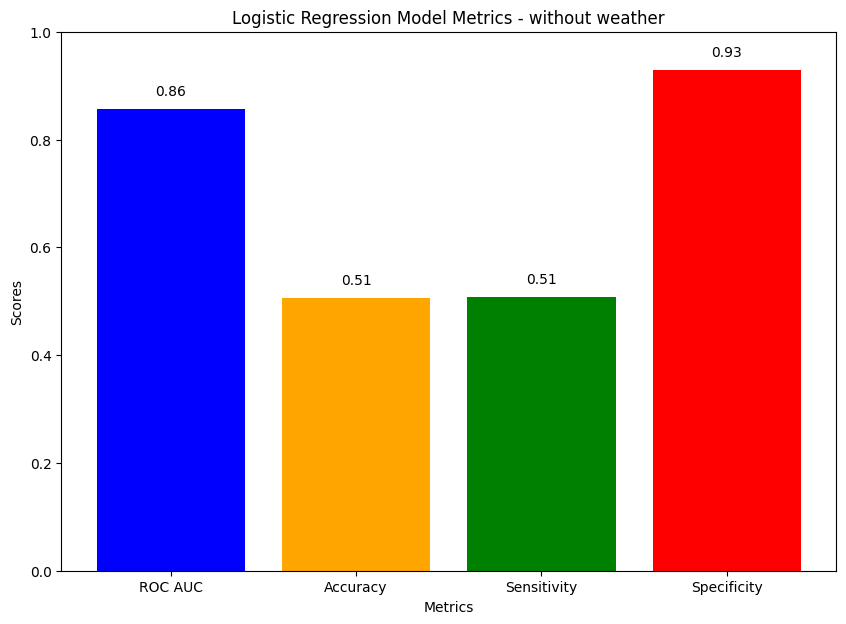

In [14]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate specificity for binary classification
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Calculate metrics
y_pred_prob = logreg.predict_proba(X_test_scaled)
y_pred = logreg.predict(X_test_scaled)

# For multi-class ROC AUC, y_test needs to be binarized
y_test_binarized = label_binarize(y_test, classes=np.unique(y))

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test_binarized, y_pred_prob, multi_class="ovr", average="macro")

# Calculate Sensitivity (Recall)
sensitivity = recall_score(y_test, y_pred, average="macro")

# Calculate Specificity
# Since specificity is not a built-in metric, we calculate it manually for each class and take the average
specificity_scores = []
for class_label in np.unique(y_train):
    # Binarize y_test for the current class
    y_test_binary = (y_test == class_label).astype(int)
    y_pred_binary = (y_pred == class_label).astype(int)
    specificity_scores.append(specificity(y_test_binary, y_pred_binary))

average_specificity = np.mean(specificity_scores)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Creating a dictionary for metrics to plot
metrics_dict = {
    'ROC AUC': roc_auc,
    'Accuracy': accuracy,
    'Sensitivity': sensitivity,
    'Specificity': average_specificity
}

# Print the metrics
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", average_specificity)

# Plotting the metrics
plt.figure(figsize=(10, 7))
plt.bar(metrics_dict.keys(), metrics_dict.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Logistic Regression Model Metrics - without weather')
plt.ylim(0, 1)
for i, v in enumerate(metrics_dict.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')
plt.show()


# # Model XGBOOST: xgboost_wo_weather

In [15]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the encoder to the target variable and transform it to integer labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now, train your XGBClassifier with the encoded target variable
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train_encoded)

# Predict on the scaled test set using the trained model
y_pred = xgb_model.predict(X_test_scaled)

# If you need to convert predictions back to original labels for interpretation
y_pred_labels = label_encoder.inverse_transform(y_pred)

print("XGBoost")

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the accuracy using the encoded test labels
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the confusion matrix using the encoded test labels
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")

# Calculate the classification report using the original string labels
# Convert encoded predictions back to original labels for interpretability
y_pred_labels = label_encoder.inverse_transform(y_pred)
class_report = classification_report(y_test, y_pred_labels)
print(f"Classification Report:\n{class_report}")


XGBoost
Accuracy: 0.5446273027169279
Confusion Matrix:
[[ 9103   152   446  2929   699     8    88    95]
 [   22  8079    97     7   597    85  2191  2449]
 [ 1041   908  4173   292   635  4815   862   839]
 [  257   125    16 11671  1192    49   117    53]
 [  885  2690   251  1404  5346   134   869  1859]
 [   10   116  2090   415   133 10298    64    75]
 [  844  4383   216    44   409   205  4137  3285]
 [  608  3854   215     4   583     7  2424  5967]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.71      0.67      0.69     13520
        Fraud and Financial Crimes       0.40      0.60      0.48     13527
              Miscellaneous Crimes       0.56      0.31      0.40     13565
             Robbery and Extortion       0.70      0.87      0.77     13480
                   Sexual Offenses       0.56      0.40      0.46     13438
                Theft and Burglary       0.66      0.78

In [16]:
# Feature importances
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
                                        Feature  Importance
4                               Weapon_Reported    0.370081
0                                      Part_1-2    0.348021
6                                    Vict_Sex_X    0.046974
5                                    Vict_Sex_M    0.030828
29                   Region_Ethnic_Origin_Other    0.015479
30                 Region_Ethnic_Origin_Unknown    0.014876
1                                      Vict_Age    0.012865
10                                       AREA_5    0.011414
28  Region_Ethnic_Origin_Hispanic/Latin/Mexican    0.006818
19                                      AREA_14    0.006575
61                                    Year_2023    0.005453
27                   Region_Ethnic_Origin_Black    0.005028
23                                      AREA_18    0.004770
9                                        AREA_4    0.004760
37                                Day_of_Week_6    0.004271
31                 

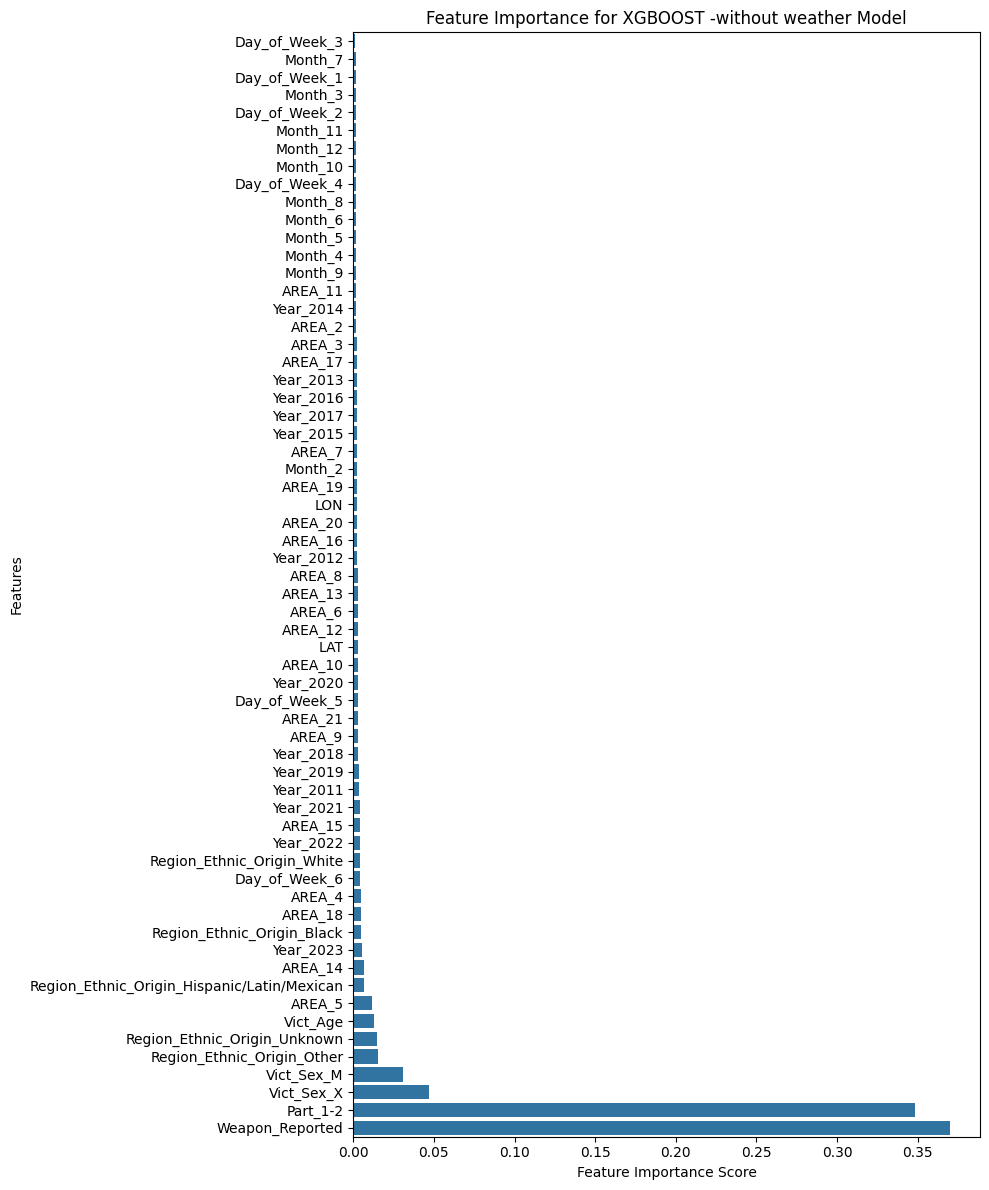

In [17]:
# Feature importances
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for XGBOOST -without weather Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

ROC AUC: 0.8568785846670723
Accuracy: 0.5446273027169279
Sensitivity: 0.545572686004704
Specificity: 0.9349362796215591


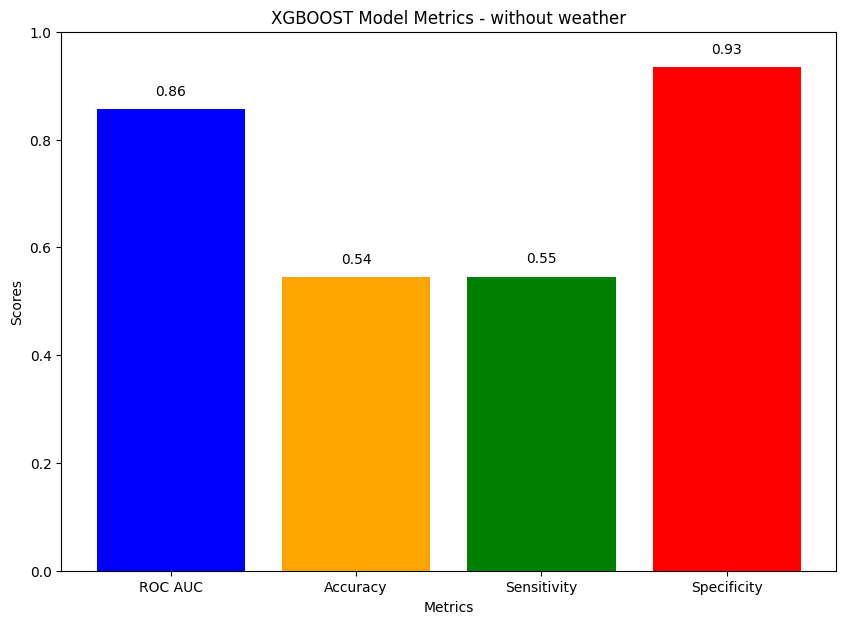

In [18]:
# Import necessary libraries
from sklearn.metrics import roc_auc_score, recall_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Calculate Sensitivity (Recall) using encoded test labels
sensitivity = recall_score(y_test_encoded, y_pred, average="macro")

# For multi-class ROC AUC, y_test needs to be binarized using encoded labels
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_train_encoded))

# Calculate ROC AUC using probabilities and binarized encoded test labels
roc_auc = roc_auc_score(y_test_binarized, y_pred_prob, multi_class="ovr", average="macro")

# Calculate Specificity
# Since specificity is not a built-in metric, we calculate it manually for each class and take the average
specificity_scores = []
for class_label in np.unique(y_train_encoded):
    # Binarize y_test for the current class using encoded labels
    y_test_binary = (y_test_encoded == class_label).astype(int)
    y_pred_binary = (y_pred == class_label).astype(int)
    specificity_scores.append(specificity(y_test_binary, y_pred_binary))

average_specificity = np.mean(specificity_scores)

# Creating a dictionary for metrics to plot
metrics_dict = {
    'ROC AUC': roc_auc,
    'Accuracy': accuracy,
    'Sensitivity': sensitivity,
    'Specificity': average_specificity
}

# Print the metrics
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", average_specificity)

# Plotting the metrics
plt.figure(figsize=(10, 7))
plt.bar(metrics_dict.keys(), metrics_dict.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('XGBOOST Model Metrics - without weather')
plt.ylim(0, 1)
for i, v in enumerate(metrics_dict.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')
plt.show()


# # Model Random Forest: rf_wo_weather

In [19]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the random forest classifier
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test_scaled)

# Evaluate the random forest classifier
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy of the random forest classifier:", accuracy_rf)

# Calculate the confusion matrix using the encoded test labels
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy of the random forest classifier: 0.5681270617887987
Confusion Matrix:
[[ 9399   142   399  2718   637    14   138    73]
 [   29  7526   181     5   813    79  2738  2156]
 [ 1051   761  4707   262   618  4606   858   702]
 [  494   105    26 11532  1114    56    99    54]
 [  808  1948   304  1316  6705   130  1069  1158]
 [   22   108  2271   426   116 10113    82    63]
 [  817  3955   363    43   662   194  4821  2668]
 [  539  2909   340     6   773    10  2578  6507]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.71      0.70      0.70     13520
        Fraud and Financial Crimes       0.43      0.56      0.49     13527
              Miscellaneous Crimes       0.55      0.35      0.42     13565
             Robbery and Extortion       0.71      0.86      0.77     13480
                   Sexual Offenses       0.59      0.50      0.54     13438
                Theft and Burgl

In [20]:
# Feature importances
feature_importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
                                        Feature  Importance
2                                           LAT    0.125748
3                                           LON    0.125494
1                                      Vict_Age    0.123848
0                                      Part_1-2    0.121119
4                               Weapon_Reported    0.114574
5                                    Vict_Sex_M    0.020302
35                                Day_of_Week_4    0.013802
34                                Day_of_Week_3    0.013251
32                                Day_of_Week_1    0.013248
33                                Day_of_Week_2    0.013206
46                                     Month_10    0.011086
43                                      Month_7    0.011079
39                                      Month_3    0.011049
44                                      Month_8    0.011006
42                                      Month_6    0.010959
40                 

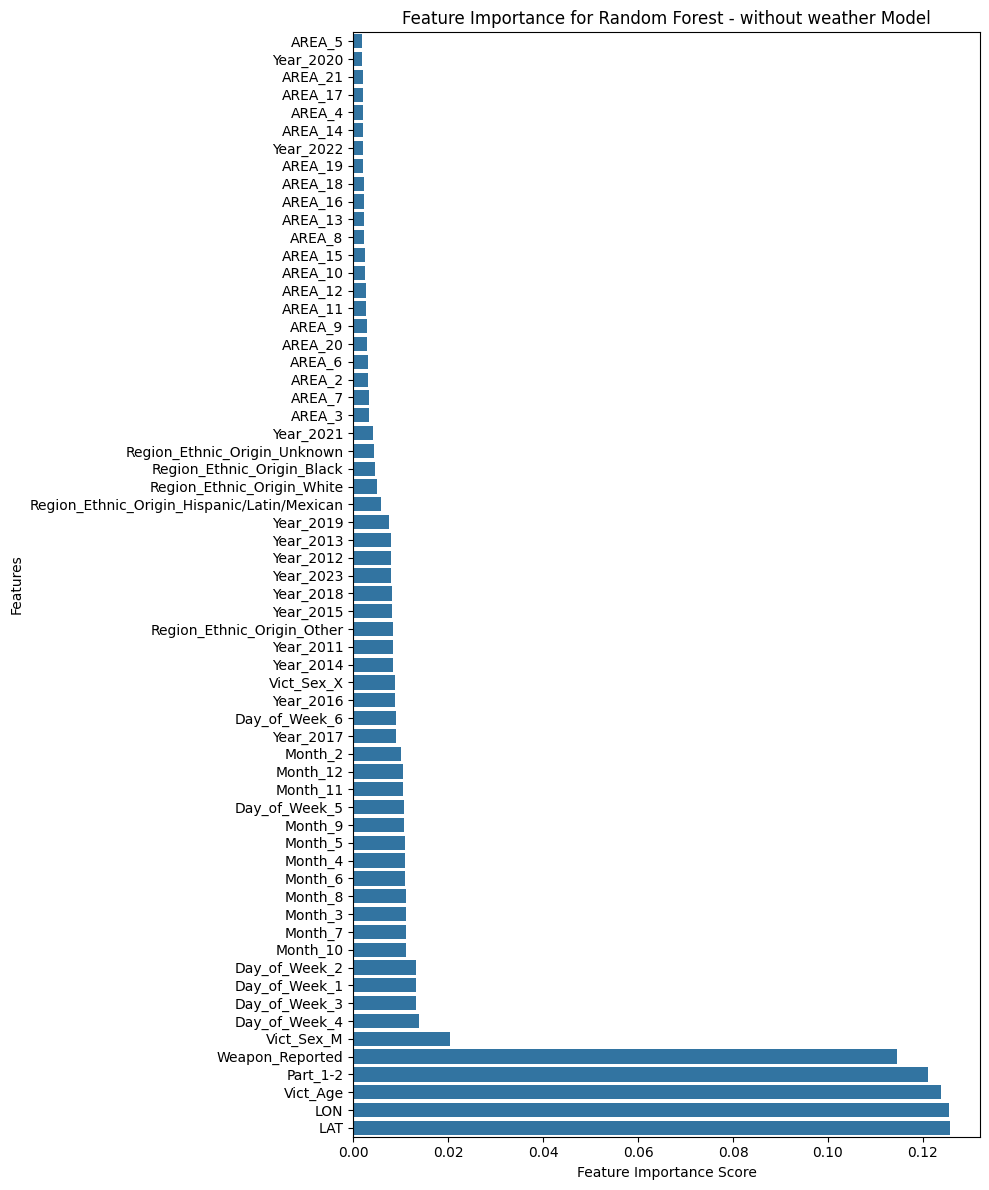

In [21]:
# Feature importances
feature_importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Random Forest - without weather Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

ROC AUC: 0.8568785846670723
Accuracy: 0.5681270617887987
Sensitivity: 0.5689839295544319
Specificity: 0.9382972867024948


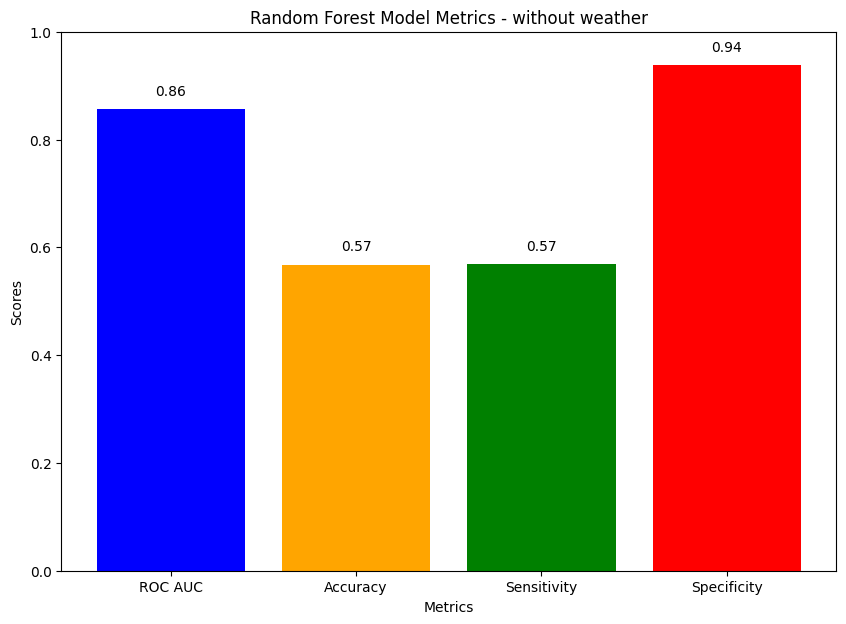

In [22]:
# Calculate Sensitivity (Recall)
sensitivity_rf = recall_score(y_test, y_pred, average="macro")

# For multi-class ROC AUC, y_test needs to be binarized
y_test_binarized = label_binarize(y_test, classes=np.unique(y))

# Calculate ROC AUC
roc_auc_rf = roc_auc_score(y_test_binarized, y_pred_prob, multi_class="ovr", average="macro")

# Calculate Specificity
# Since specificity is not a built-in metric, we calculate it manually for each class and take the average
specificity_scores_rf = []
for class_label in np.unique(y_train):
    # Binarize y_test for the current class
    y_test_binary = (y_test == class_label).astype(int)
    y_pred_binary = (y_pred == class_label).astype(int)
    specificity_scores_rf.append(specificity(y_test_binary, y_pred_binary))

average_specificity_rf = np.mean(specificity_scores_rf)

# Creating a dictionary for metrics to plot
metrics_dict_rf = {
    'ROC AUC': roc_auc_rf,
    'Accuracy': accuracy_rf,
    'Sensitivity': sensitivity_rf,
    'Specificity': average_specificity_rf
}

# Print the metrics
print("ROC AUC:", roc_auc_rf)
print("Accuracy:", accuracy_rf)
print("Sensitivity:", sensitivity_rf)
print("Specificity:", average_specificity_rf)

# Plotting the metrics
plt.figure(figsize=(10, 7))
plt.bar(metrics_dict_rf.keys(), metrics_dict_rf.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Random Forest Model Metrics - without weather')
plt.ylim(0, 1)
for i, v in enumerate(metrics_dict_rf.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')
plt.show()


# Model KNN: knn_wo_weather

In [23]:
# Training the model and predicting on test data
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("KNN")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

KNN
Accuracy: 0.3378831683902294
Confusion Matrix:
[[6240 1128  704 2535 1460  213  594  646]
 [ 840 6110  759  165 1536  418 1907 1792]
 [1590 2025 3398  973 1232 2427  982  938]
 [3188  426  681 7247  979  554  208  197]
 [2313 2785  935 1494 3237  420 1126 1128]
 [ 685 1756 3077 1337  902 4112  682  650]
 [1396 4011 1040  423 1429  511 2681 2032]
 [1185 3633  952  252 1556  434 2212 3438]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.36      0.46      0.40     13520
        Fraud and Financial Crimes       0.28      0.45      0.35     13527
              Miscellaneous Crimes       0.29      0.25      0.27     13565
             Robbery and Extortion       0.50      0.54      0.52     13480
                   Sexual Offenses       0.26      0.24      0.25     13438
                Theft and Burglary       0.45      0.31      0.37     13201
     Vandalism and Property Damage       0.26  

ROC AUC: 0.6216739921115875
Accuracy: 0.3378831683902294
Sensitivity: 0.33795173731589345
Specificity: 0.9053962469072815


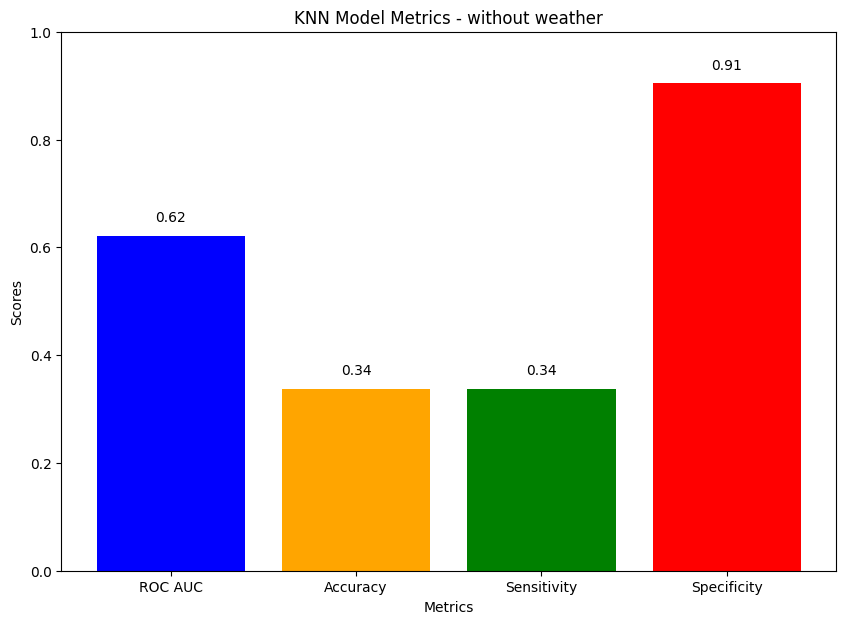

In [24]:
from sklearn.metrics import recall_score, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Define the specificity function
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=np.unique(y_true)).ravel()
    return tn / (tn + fp)

# Assuming y_pred is already defined from your KNN model predictions
# Calculate Sensitivity (Recall)
sensitivity_knn = recall_score(y_test, y_pred, average="macro")

# Binarize y_test for ROC AUC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Generate dummy probabilities for KNN since KNN does not provide predict_proba by default
# For a more accurate ROC AUC, consider using a classifier that provides probability estimates
y_pred_prob_dummy = np.zeros((y_test_binarized.shape[0], y_test_binarized.shape[1]))
for idx, label in enumerate(np.unique(y_test)):
    y_pred_prob_dummy[:, idx] = (y_pred == label).astype(int)

# Calculate ROC AUC
roc_auc_knn = roc_auc_score(y_test_binarized, y_pred_prob_dummy, multi_class="ovr", average="macro")

# Calculate Specificity
specificity_scores_knn = []
for class_label in np.unique(y_test):
    y_test_binary = (y_test == class_label).astype(int)
    y_pred_binary = (y_pred == class_label).astype(int)
    specificity_scores_knn.append(specificity(y_test_binary, y_pred_binary))

average_specificity_knn = np.mean(specificity_scores_knn)

# Creating a dictionary for metrics to plot
metrics_dict_knn = {
    'ROC AUC': roc_auc_knn,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Sensitivity': sensitivity_knn,
    'Specificity': average_specificity_knn
}

# Print the metrics
print("ROC AUC:", roc_auc_knn)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Sensitivity:", sensitivity_knn)
print("Specificity:", average_specificity_knn)

# Plotting the metrics
plt.figure(figsize=(10, 7))
plt.bar(metrics_dict_knn.keys(), metrics_dict_knn.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('KNN Model Metrics - without weather')
plt.ylim(0, 1)
for i, v in enumerate(metrics_dict_knn.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')
plt.show()


In [25]:
# Take too long ?

# from sklearn.inspection import permutation_importance

# # Calculating permutation feature importance
# perm_importance = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

# # Map the importances to the feature names and sort them
# feature_names = X.columns
# feature_importance_df = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': perm_importance.importances_mean
# }).sort_values(by='Importance', ascending=False)

# # Plotting the feature importances
# plt.figure(figsize=(10, 12))
# sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
# plt.xlabel('Permutation Importance')
# plt.ylabel('Features')
# plt.title('Permutation Feature Importance for KNN Model')
# plt.tight_layout()  # Adjust the layout to fit all the labels
# plt.show()

In [26]:
# X columns
print('Shape of X:', X.shape)
print(X.columns)

Shape of X: (539576, 62)
Index(['Part_1-2', 'Vict_Age', 'LAT', 'LON', 'Weapon_Reported', 'Vict_Sex_M',
       'Vict_Sex_X', 'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6',
       'AREA_7', 'AREA_8', 'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12',
       'AREA_13', 'AREA_14', 'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18',
       'AREA_19', 'AREA_20', 'AREA_21', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016',
       'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021',
       'Year_2022', 'Year_2023'],
      dtype='ob

# Summary for all models

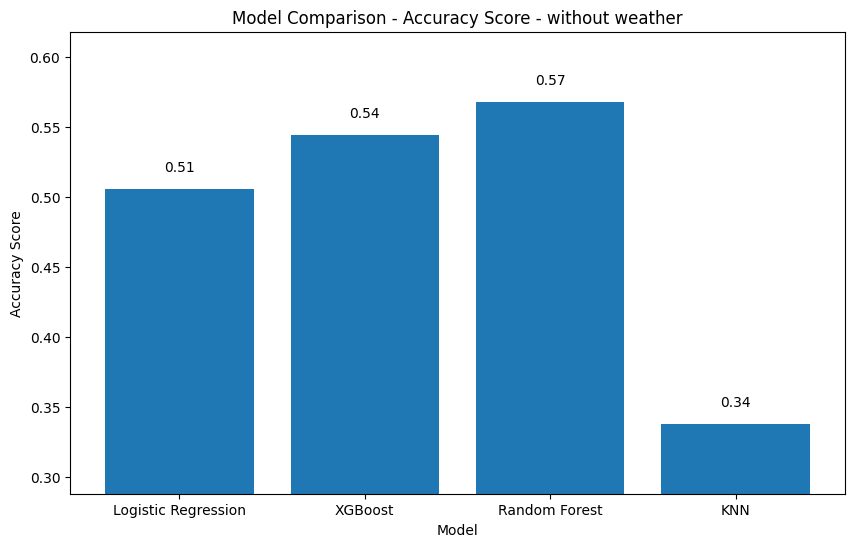

In [27]:
import matplotlib.pyplot as plt

# Placeholder for accuracy scores
accuracy_scores = {}

# Logistic Regression
logreg_accuracy = accuracy_score(y_test, logreg.predict(X_test_scaled))
accuracy_scores['Logistic Regression'] = logreg_accuracy

# XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
accuracy_scores['XGBoost'] = xgb_accuracy

# Random Forest
rf_accuracy = accuracy_score(y_test, rf.predict(X_test_scaled))
accuracy_scores['Random Forest'] = rf_accuracy

# KNN
knn_accuracy = accuracy_score(y_test, knn.predict(X_test_scaled))
accuracy_scores['KNN'] = knn_accuracy

# Now create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison - Accuracy Score - without weather')
plt.ylim([min(accuracy_scores.values()) - 0.05, max(accuracy_scores.values()) + 0.05])
for i, v in enumerate(accuracy_scores.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()


In [28]:
# TP, FP, TN, and FN by model.

# Logistic Regression
y_pred = logreg.predict(X_test_scaled)
conf_matrix_logreg = metrics.confusion_matrix(y_test, y_pred)
TP_logreg = conf_matrix_logreg[1, 1]
FP_logreg = conf_matrix_logreg[0, 1]
TN_logreg = conf_matrix_logreg[0, 0]
FN_logreg = conf_matrix_logreg[1, 0]

# XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)
conf_matrix_xgb = metrics.confusion_matrix(y_test_encoded, y_pred_xgb)
TP_xgb = conf_matrix_xgb[1, 1]
FP_xgb = conf_matrix_xgb[0, 1]
TN_xgb = conf_matrix_xgb[0, 0]
FN_xgb = conf_matrix_xgb[1, 0]

# Random Forest
y_pred_rf = rf.predict(X_test_scaled)
conf_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)
TP_rf = conf_matrix_rf[1, 1]
FP_rf = conf_matrix_rf[0, 1]
TN_rf = conf_matrix_rf[0, 0]
FN_rf = conf_matrix_rf[1, 0]

# KNN
y_pred_knn = knn.predict(X_test_scaled)
conf_matrix_knn = metrics.confusion_matrix(y_test, y_pred_knn)
TP_knn = conf_matrix_knn[1, 1]
FP_knn = conf_matrix_knn[0, 1]
TN_knn = conf_matrix_knn[0, 0]
FN_knn = conf_matrix_knn[1, 0]

# Creating a DataFrame to summarize the model performance
model_performance_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'XGBoost', 'Random Forest', 'KNN'],
    'TP': [TP_logreg, TP_xgb, TP_rf, TP_knn],
    'FP': [FP_logreg, FP_xgb, FP_rf, FP_knn],
    'TN': [TN_logreg, TN_xgb, TN_rf, TN_knn],
    'FN': [FN_logreg, FN_xgb, FN_rf, FN_knn]
})

# Display the summary table
print("Model Performance Summary - without weather:")
print(model_performance_summary)


Model Performance Summary - without weather:
                 Model    TP    FP    TN   FN
0  Logistic Regression  7613   163  9399   22
1              XGBoost  8079   152  9103   22
2        Random Forest  7526   142  9399   29
3                  KNN  6110  1128  6240  840


In [29]:
from sklearn.metrics import cohen_kappa_score

# Logistic Regression
y_pred_lr = logreg.predict(X_test_scaled)
cohen_kappa_score_lr = cohen_kappa_score(y_test, y_pred_lr)

# XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)
cohen_kappa_score_xgb = cohen_kappa_score(y_test_encoded, y_pred_xgb)

# Random Forest
y_pred_rf = rf.predict(X_test_scaled)
cohen_kappa_score_rf = cohen_kappa_score(y_test, y_pred_rf)

# KNN
y_pred_knn = knn.predict(X_test_scaled)
cohen_kappa_score_knn = cohen_kappa_score(y_test, y_pred_knn)

# Create a dictionary to store the data
data = {
    'Model': ['Logistic Regression', 'XGBoost', 'Random Forest', 'KNN'],
    'Cohen''s Kappa Score': [cohen_kappa_score_lr, cohen_kappa_score_xgb, cohen_kappa_score_rf, cohen_kappa_score_knn],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print("Cohen's Kappa Score - without weather:")
print(df.to_string())


Cohen's Kappa Score - without weather:
                 Model  Cohens Kappa Score
0  Logistic Regression            0.435397
1              XGBoost            0.479602
2        Random Forest            0.506465
3                  KNN            0.243217


In [30]:
from sklearn.metrics import log_loss

# Logistic Regression
y_pred_prob_lr = logreg.predict_proba(X_test_scaled)
log_loss_lr = log_loss(y_test, y_pred_prob_lr)

# XGBoost
y_pred_prob_xgb = xgb_model.predict_proba(X_test_scaled)
log_loss_xgb = log_loss(y_test_encoded, y_pred_prob_xgb)

# Random Forest
y_pred_prob_rf = rf.predict_proba(X_test_scaled)
log_loss_rf = log_loss(y_test, y_pred_prob_rf)

# KNN
# KNN does not provide predict_proba by default
# For a more accurate log loss calculation, consider using a classifier that provides probability estimates
y_pred_prob_knn = np.zeros((y_test.shape[0], len(np.unique(y_test))))
for i, label in enumerate(np.unique(y_test)):
    y_pred_prob_knn[:, i] = (y_pred_knn == label).astype(int)
log_loss_knn = log_loss(y_test, y_pred_prob_knn)

# Creating a dictionary for log loss values
log_loss_dict = {
    'Logistic Regression': log_loss_lr,
    'XGBoost': log_loss_xgb,
    'Random Forest': log_loss_rf,
    'KNN': log_loss_knn
}

# Print the log loss values
print("Log Loss Values - without weather:")
for model, log_loss in log_loss_dict.items():
    print(f"{model}: {log_loss}")


Log Loss Values - without weather:
Logistic Regression: 1.2543124138683812
XGBoost: 1.1121562540645757
Random Forest: 1.3086928079710605
KNN: 23.86510958164302
